# Evaluate

Can seasonal forecasts be used as 'alternate' realities? Here we show how a set of evaluation metrics can be used to answer this question. The evaluation metrics are available through an [R package](https://github.com/timokelder/UNSEEN) for easy evaluation of the UNSEEN ensemble. Here, we illustrate how this package can be used in the UNSEEN workflow.  We will evaluate the generated UNSEEN ensemble of UK February precipitation and of MAM Siberian heatwaves. 

<div class="alert alert-info">

Note

This is R code and not python!
    
We switch to R since we believe R has a better functionality in extreme value statistics. 

</div>

We load the UNSEEN package and read in the data.

In [1]:
setwd('../../..')
getwd()

[1] "C:/Users/Timo/OneDrive - Loughborough University/GitHub/UNSEEN-open"

In [2]:
library(UNSEEN)

The data that is imported here are the files stored at the end of the [preprocessing step](../2.Preprocess/2.Preprocess.ipynb).


In [39]:
SEAS5_Siberia_events <- read.csv("Data/SEAS5_Siberia_events.csv", stringsAsFactors=FALSE)
ERA5_Siberia_events <- read.csv("Data/ERA5_Siberia_events.csv", stringsAsFactors=FALSE)

In [40]:
SEAS5_Siberia_events_zoomed <- read.csv("Data/SEAS5_Siberia_events_zoomed.csv", stringsAsFactors=FALSE)
ERA5_Siberia_events_zoomed <- read.csv("Data/ERA5_Siberia_events_zoomed.csv", stringsAsFactors=FALSE)

In [41]:
SEAS5_Siberia_events$t2m <- SEAS5_Siberia_events$t2m - 273.15
ERA5_Siberia_events$t2m <- ERA5_Siberia_events$t2m - 273.15
SEAS5_Siberia_events_zoomed$t2m <- SEAS5_Siberia_events_zoomed$t2m - 273.15
ERA5_Siberia_events_zoomed$t2m <- ERA5_Siberia_events_zoomed$t2m - 273.15

In [42]:
head(SEAS5_Siberia_events_zoomed,n = 3)
head(ERA5_Siberia_events, n = 3)

,year,leadtime,number,t2m
,<int>,<int>,<int>,<dbl>
1,1982,2,0,-3.736505
2,1982,2,1,-5.682759
3,1982,2,2,-4.221411


,year,t2m
,<int>,<dbl>
1,1979,4.010750
2,1980,3.880965
3,1981,4.822891


In [6]:
EOBS_UK_weighted_df <- read.csv("Data/EOBS_UK_weighted_upscaled.csv", stringsAsFactors=FALSE)
SEAS5_UK_weighted_df <- read.csv("Data/SEAS5_UK_weighted_masked.csv", stringsAsFactors=FALSE)

And then convert the time class to Date format, with the ymd function in lubridate:

In [7]:
EOBS_UK_weighted_df$time <- lubridate::ymd(EOBS_UK_weighted_df$time)
str(EOBS_UK_weighted_df)

SEAS5_UK_weighted_df$time <- lubridate::ymd(SEAS5_UK_weighted_df$time)
str(SEAS5_UK_weighted_df)

'data.frame':	71 obs. of  2 variables:
 $ time: Date, format: "1950-02-28" "1951-02-28" ...
 $ rr  : num  4.13 3.25 1.07 1.59 2.59 ...
'data.frame':	4375 obs. of  4 variables:
 $ leadtime: int  2 2 2 2 2 2 2 2 2 2 ...
 $ number  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ time    : Date, format: "1982-02-01" "1983-02-01" ...
 $ tprate  : num  1.62 2.93 3.27 2 3.31 ...


## Timeseries

Warning message:
"Removed 2756 rows containing non-finite values (stat_boxplot)."


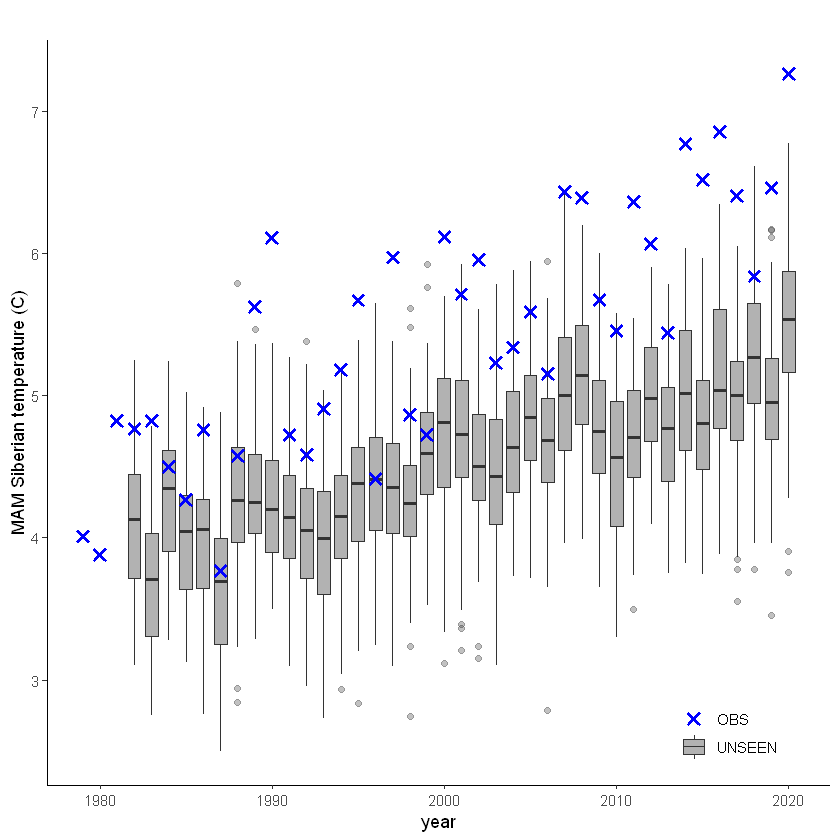

In [43]:
unseen_timeseries(
    ensemble = SEAS5_Siberia_events,
    obs = ERA5_Siberia_events,
    ensemble_yname = "t2m",
    ensemble_xname = "year",
    obs_yname = "t2m",
    obs_xname = "year",
    ylab = "MAM Siberian temperature (C)")

Warning message:
"Removed 2756 rows containing non-finite values (stat_boxplot)."


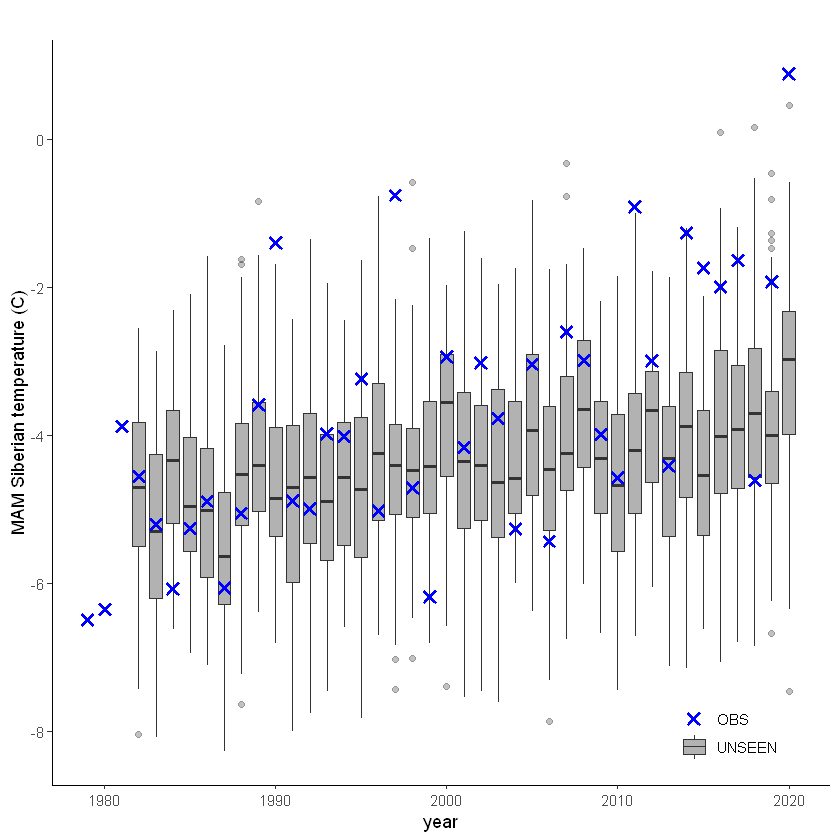

In [44]:
unseen_timeseries(
    ensemble = SEAS5_Siberia_events_zoomed,
    obs = ERA5_Siberia_events_zoomed,
    ensemble_yname = "t2m",
    ensemble_xname = "year",
    obs_yname = "t2m",
    obs_xname = "year",
    ylab = "MAM Siberian temperature (C)")

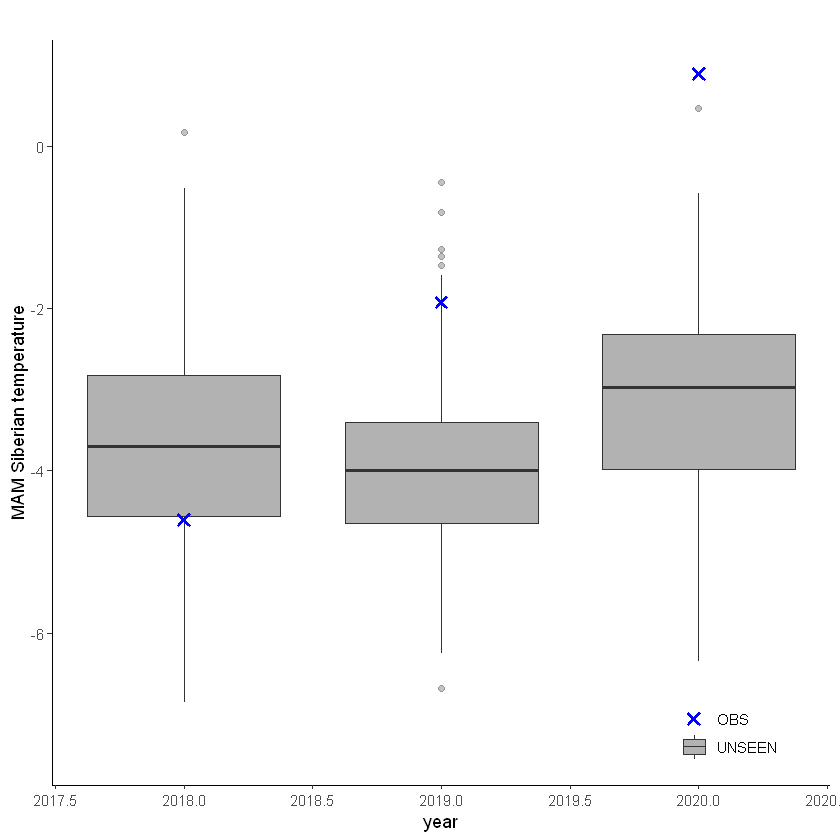

In [45]:
unseen_timeseries(
    ensemble = SEAS5_Siberia_events_zoomed[SEAS5_Siberia_events_zoomed$year > 2017,],
    obs = ERA5_Siberia_events_zoomed[ERA5_Siberia_events_zoomed$year > 2017,],
    ensemble_yname = "t2m",
    ensemble_xname = "year",
    obs_yname = "t2m",
    obs_xname = "year",
    ylab = "MAM Siberian temperature")

 

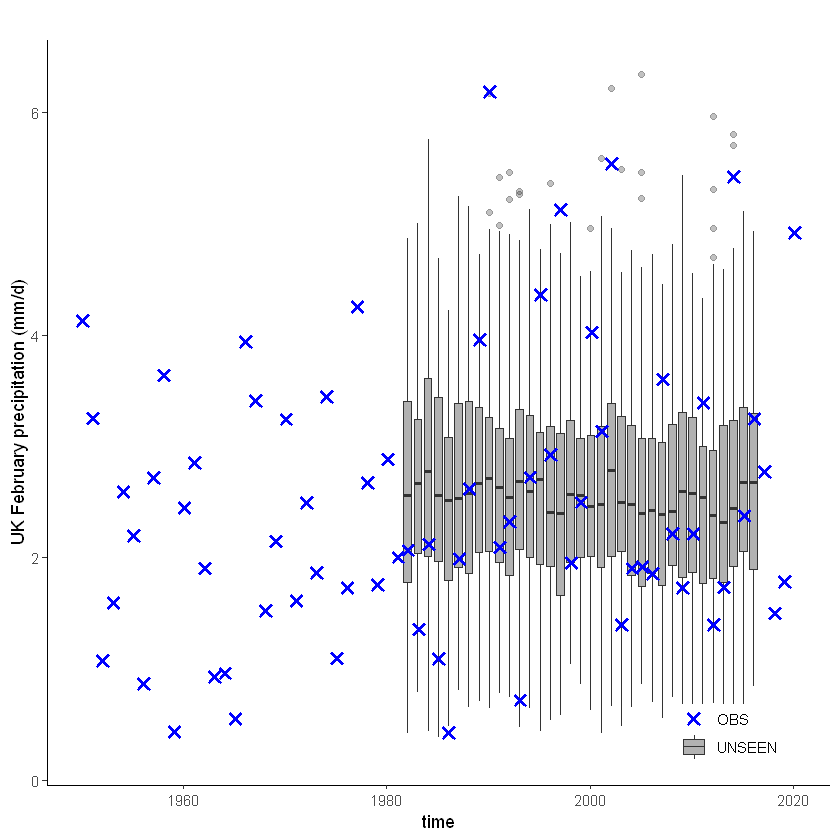

In [46]:
unseen_timeseries(ensemble = SEAS5_UK_weighted_df,
                  obs = EOBS_UK_weighted_df,
                  ylab = 'UK February precipitation (mm/d)')

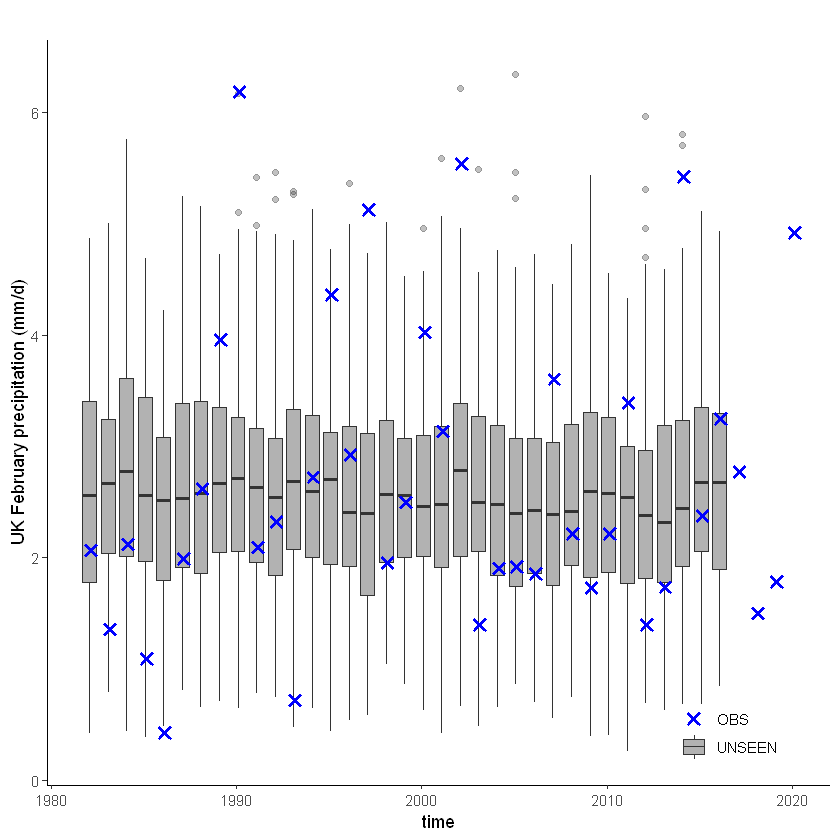

In [47]:
unseen_timeseries(ensemble = SEAS5_UK_weighted_df,
                  obs = EOBS_UK_weighted_df[EOBS_UK_weighted_df$time > '1982-02-01',],
                  ylab = 'UK February precipitation (mm/d)')

Call the documentation of the function with `?unseen_timeseries`

## Independence

Significance ranges need fixing + detrend method (Rob)

Warning message:
"Removed 975 rows containing non-finite values (stat_ydensity)."
Warning message:
"Removed 975 rows containing non-finite values (stat_boxplot)."


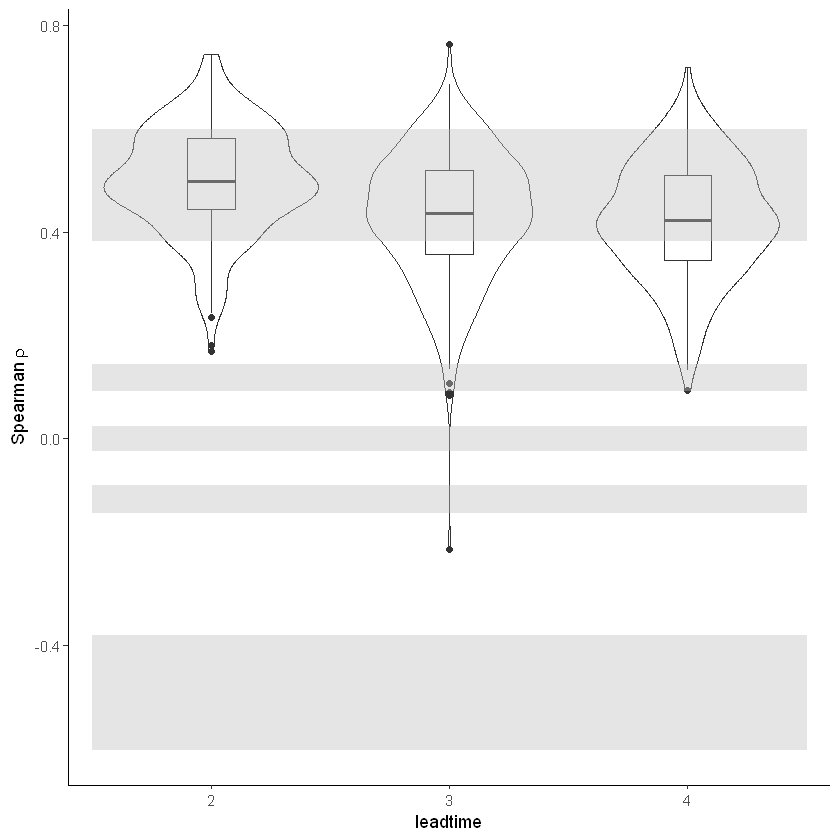

In [23]:
independence_test(
    ensemble = SEAS5_Siberia_events,
    n_lds = 3,
    var_name = "t2m",
)

Warning message:
“Removed 975 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 975 rows containing non-finite values (stat_boxplot).”


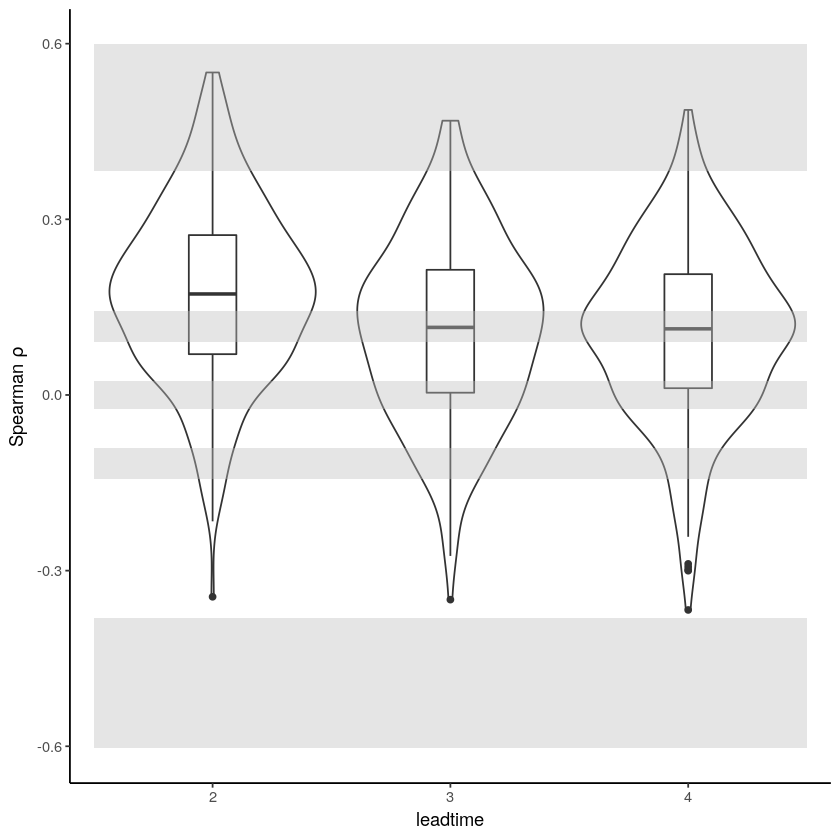

In [13]:
independence_test(
    ensemble = SEAS5_Siberia_events_zoomed,
    n_lds = 3,
    var_name = "t2m",
)

Warning message:
“Removed 1625 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 1625 rows containing non-finite values (stat_boxplot).”


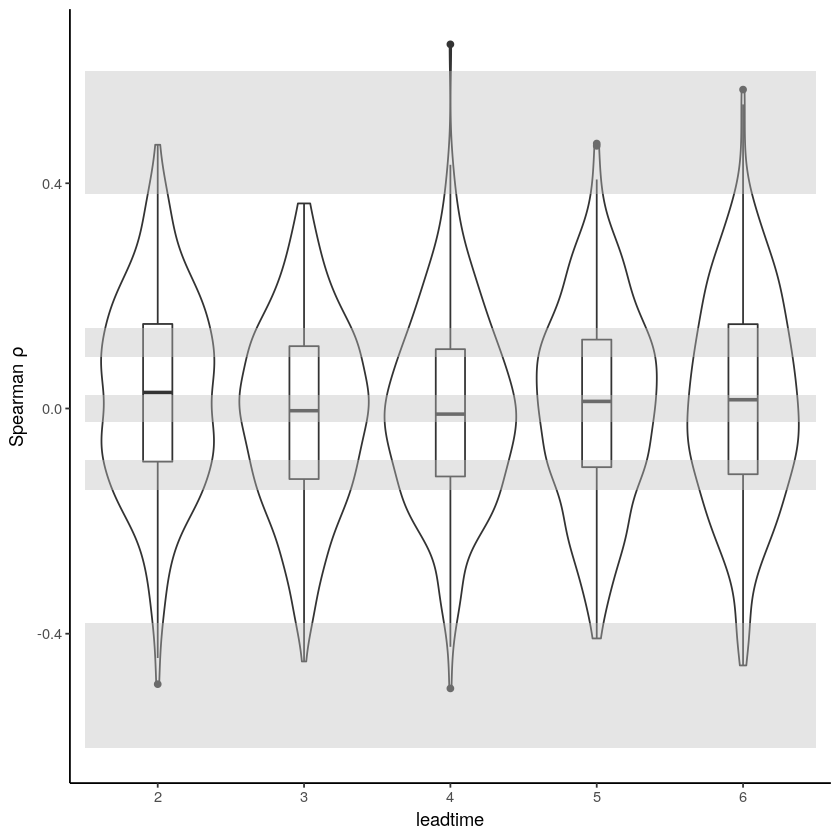

In [7]:
independence_test(ensemble = SEAS5_UK)

## Stability

Na.rm = True needed

In [50]:
stability_test(
    ensemble = SEAS5_Siberia_events_zoomed[SEAS5_Siberia_events_zoomed$year < 2016,],
    lab = 'MAM Siberian temperature',
    var_name = 't2m'
)

ERROR: Error in quantile.default(newX[, i], ...): missing values and NaN's not allowed if 'na.rm' is FALSE


Warning message:
“Removed 4 row(s) containing missing values (geom_path).”


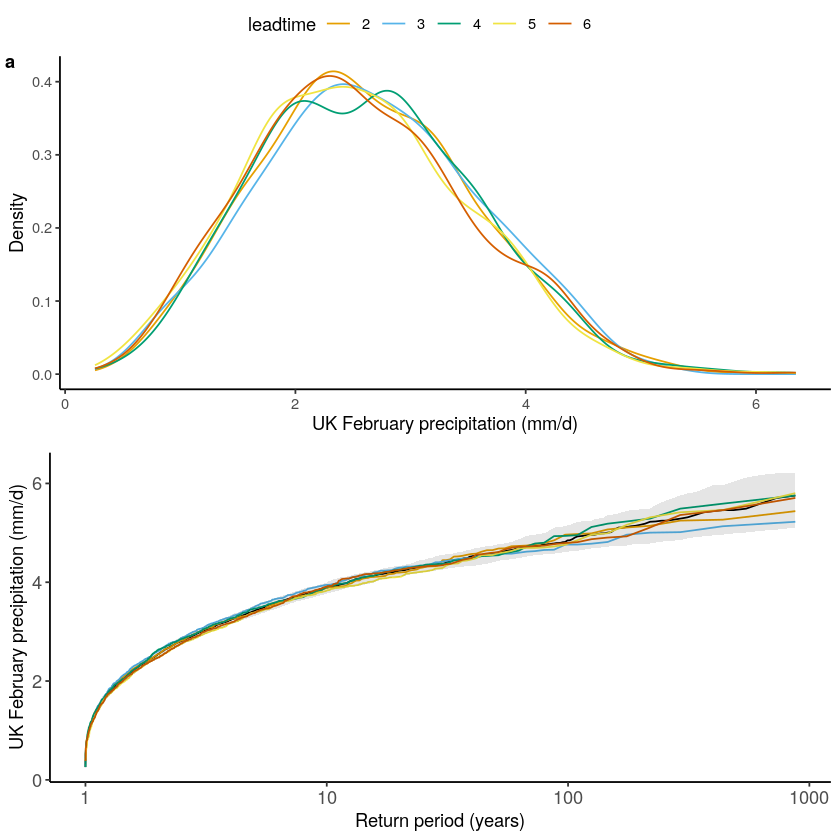

In [8]:
stability_test(ensemble = SEAS5_UK, lab = 'UK February precipitation (mm/d)')

## Fidelity

Unit is incorrect + na.rm = False (needs to be true) -> needs fixing

In [52]:
fidelity_test(
    obs = ERA5_Siberia_events_zoomed$t2m,
    ensemble = SEAS5_Siberia_events_zoomed$t2m,
    biascor = TRUE
)

ERROR: Error in quantile.default(bootstrapped_fun, probs = c(0.025, 0.975)): missing values and NaN's not allowed if 'na.rm' is FALSE


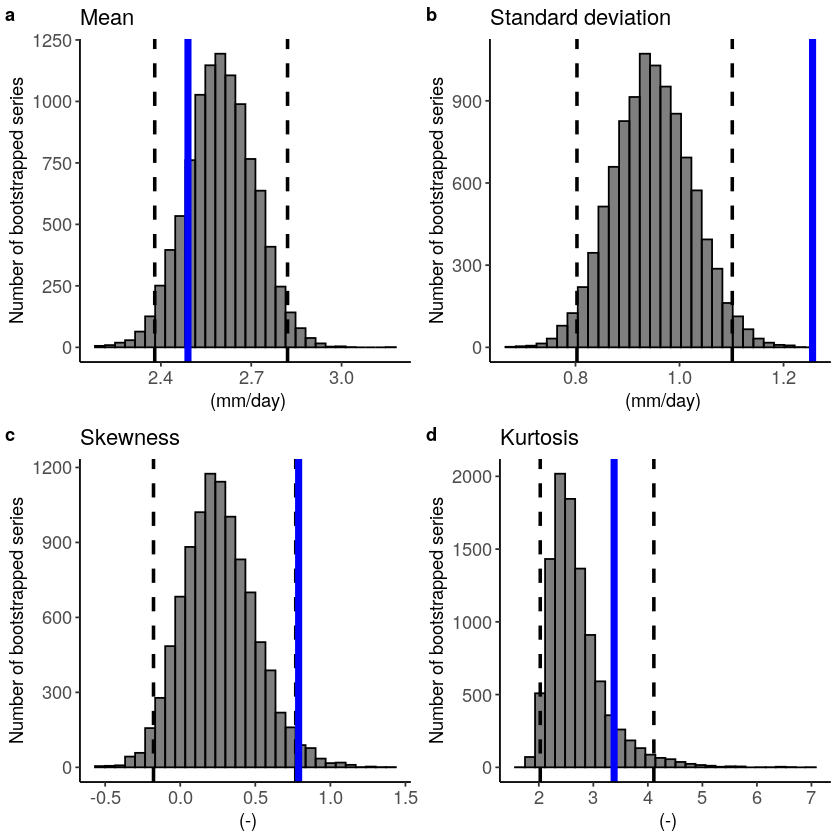

In [9]:
fidelity_test(obs = EOBS_UK$rr, ensemble = SEAS5_UK$tprate)

To include a mean-bias correction, set `biascor = TRUE`:

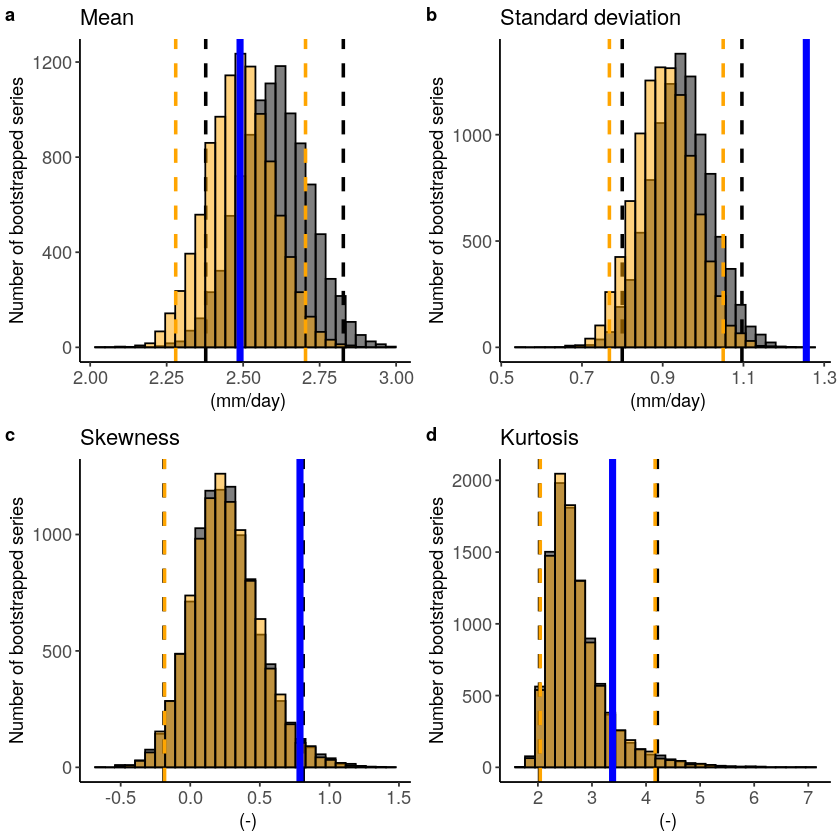

In [10]:
fidelity_test(obs = EOBS_UK$rr, ensemble = SEAS5_UK$tprate, biascor = TRUE)

In [16]:
?fidelity_test

# Evaluate